In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:

data_set0 = pd.read_csv('/content/sample_data/mnist_train_small.csv')
print(data_set0.head())


   6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
0  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.584  0.585  0.586  0.587  0.588  0.589  0.590  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [7]:
data_set0.rename(columns = {'6':'label'}, inplace = True)

In [8]:
#Saving labels to a variable called label.
label = data_set0['label']


In [9]:
#Dropping label column.
data_set1 = data_set0.drop("label", axis = 1) 

In [10]:
print(label.shape)
print(data_set1.shape)

(19999,)
(19999, 784)


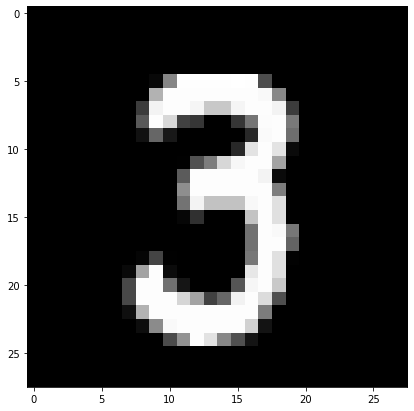

3


In [11]:
#Plotting a random number

plt.figure(figsize=(7,7))
idx = 3691 #Enter any random index value from 0 to 41999.

grid_data = data_set1.iloc[idx].values.reshape(28,28)  #Use 'as_matrix()' if 'values' doesn't work.
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[idx])

In [12]:
labels = label.head(42000)
data = data_set1.head(42000)

print(data.shape)

(19999, 784)


In [13]:

#Standardizing the data.
#StandardScaler is present in 'sklearn.preprocessing' module.

standardized_data = StandardScaler().fit_transform(data.astype(float))
print(standardized_data.shape)


(19999, 784)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


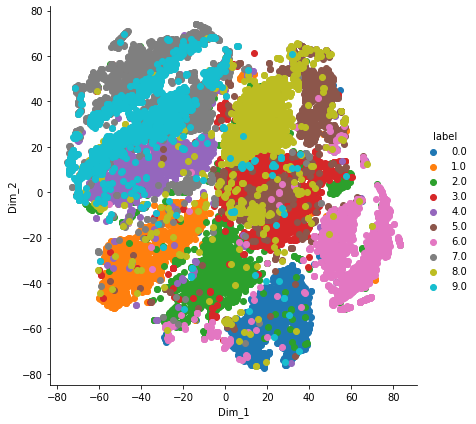

In [14]:
# TSNE

data = standardized_data[:,:]

# since t-SNE is a randomized/stochastic/probabilistic algorithm it might show different results everytime it is run.
# random_state=0 makes sure the results are not different everytime t-SNE is run.
model = TSNE(n_components=2, random_state=0) 
# Configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)


# Creating a new data frame which helps us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Use size if height results in warning.
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


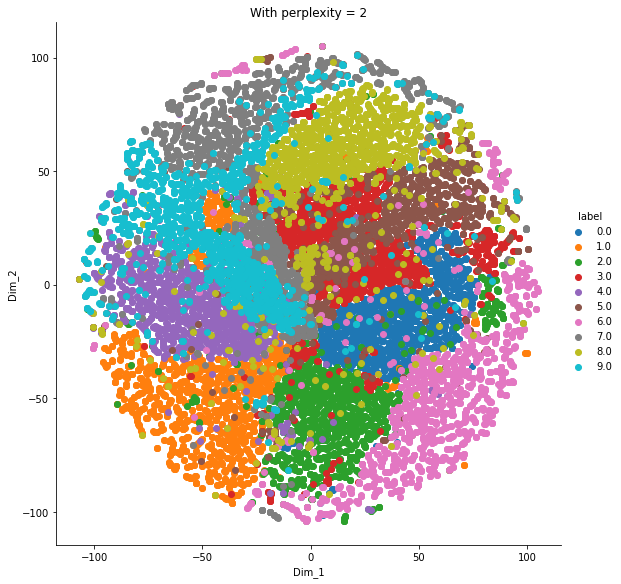

In [15]:
# With changed perplexity=2

model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data) 

# creating a new dataframe which helps us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()
